In [1]:
#Name: Rawan Essam
#Email:rawanessam34@gmail.com
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata
import seaborn as sb
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, average_precision_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


# Importing Datasets

In [2]:
training_df= pd.read_csv('training (1).csv',sep=';')
test_df=pd.read_csv('validation (1).csv',sep=';')

# Data Exploration and Cleaning

In [3]:
training_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [4]:
test_df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [5]:
#checking for duplicates
df=training_df.copy()
dup_rows=df[df.duplicated()]
print(len(dup_rows),len(training_df))

3210 3700


In [6]:
#checking for duplicates
df2=test_df.copy()
dup_rows2=df2[df2.duplicated()]
print(len(dup_rows2),len(test_df))

0 200


In [7]:
#removing Duplicates
train_df=training_df.drop_duplicates()
print(len(train_df))

490


In [8]:
#checking for null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 19 columns):
variable1     481 non-null object
variable2     481 non-null object
variable3     490 non-null object
variable4     486 non-null object
variable5     486 non-null object
variable6     484 non-null object
variable7     484 non-null object
variable8     490 non-null object
variable9     490 non-null object
variable10    490 non-null object
variable11    490 non-null int64
variable12    490 non-null object
variable13    490 non-null object
variable14    480 non-null float64
variable15    490 non-null int64
variable17    480 non-null float64
variable18    220 non-null object
variable19    490 non-null int64
classLabel    490 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 76.6+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
variable1     197 non-null object
variable2     197 non-null object
variable3     200 non-null object
variable4     198 non-null object
variable5     198 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     200 non-null object
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    197 non-null float64
variable15    200 non-null int64
variable17    197 non-null float64
variable18    89 non-null object
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 29.8+ KB


In [10]:
train_df['variable18'].unique()

array(['t', nan, 'f'], dtype=object)

In [11]:
training_df['variable17'].unique()

array([  800000.,  2000000.,   960000.,        0.,  2320000.,  1600000.,
        2760000.,  2800000.,  2200000.,  3200000.,  3400000.,  1200000.,
        1780000.,  4160000.,  1800000.,  2920000.,  2880000.,       nan,
        2400000.,  3000000.,  9800000.,  4000000.,  1000000.,  1080000.,
        1880000.,  2210000.,  3330000.,   880000.,  1640000.,  2250000.,
        3120000.,  3930000.,   290000.,  2600000.,   520000.,  2280000.,
         300000.,  3700000.,  5190000.,   930000.,  3560000.,  6000000.,
        4200000.,  1400000.,  1500000.,   920000.,  4650000.,  1280000.,
        6800000.,  1450000.,  3600000.,   400000.,  4400000.,   500000.,
        3490000.,   240000.,   490000., 11600000.,  7600000.,  2080000.,
         700000.,  1440000.,  2720000.,  1760000.,  2240000.,  4110000.,
         940000.,   280000.,   200000.,  4500000.,  2110000.,  2740000.,
         600000.,  2900000.,  1170000.,  1540000.,  3690000.,   760000.,
         620000.,  1740000.,  7200000.,  3960000., 

In [12]:
#more than half of variable18 has a NAN value so dropping the col would be better than dropping all the record with NAN
df_train_drop=train_df.drop(columns=['variable18'])
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 489
Data columns (total 18 columns):
variable1     481 non-null object
variable2     481 non-null object
variable3     490 non-null object
variable4     486 non-null object
variable5     486 non-null object
variable6     484 non-null object
variable7     484 non-null object
variable8     490 non-null object
variable9     490 non-null object
variable10    490 non-null object
variable11    490 non-null int64
variable12    490 non-null object
variable13    490 non-null object
variable14    480 non-null float64
variable15    490 non-null int64
variable17    480 non-null float64
variable19    490 non-null int64
classLabel    490 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 72.7+ KB


In [13]:
test_df=test_df.drop(columns=['variable18'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
variable1     197 non-null object
variable2     197 non-null object
variable3     200 non-null object
variable4     198 non-null object
variable5     198 non-null object
variable6     197 non-null object
variable7     197 non-null object
variable8     200 non-null object
variable9     200 non-null object
variable10    200 non-null object
variable11    200 non-null int64
variable12    200 non-null object
variable13    200 non-null object
variable14    197 non-null float64
variable15    200 non-null int64
variable17    197 non-null float64
variable19    200 non-null int64
classLabel    200 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 28.2+ KB


In [14]:
#dropping the ramaining null enteris- fewer in number now
df_train_drop=df_train_drop.dropna()
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 489
Data columns (total 18 columns):
variable1     462 non-null object
variable2     462 non-null object
variable3     462 non-null object
variable4     462 non-null object
variable5     462 non-null object
variable6     462 non-null object
variable7     462 non-null object
variable8     462 non-null object
variable9     462 non-null object
variable10    462 non-null object
variable11    462 non-null int64
variable12    462 non-null object
variable13    462 non-null object
variable14    462 non-null float64
variable15    462 non-null int64
variable17    462 non-null float64
variable19    462 non-null int64
classLabel    462 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 68.6+ KB


In [15]:
test_df=test_df.dropna()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 199
Data columns (total 18 columns):
variable1     191 non-null object
variable2     191 non-null object
variable3     191 non-null object
variable4     191 non-null object
variable5     191 non-null object
variable6     191 non-null object
variable7     191 non-null object
variable8     191 non-null object
variable9     191 non-null object
variable10    191 non-null object
variable11    191 non-null int64
variable12    191 non-null object
variable13    191 non-null object
variable14    191 non-null float64
variable15    191 non-null int64
variable17    191 non-null float64
variable19    191 non-null int64
classLabel    191 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 28.4+ KB


In [16]:
#checking data balance
yes_enteries= df_train_drop['classLabel'].value_counts()['yes.']
no_enteries=df_train_drop['classLabel'].value_counts()['no.']
print('No label ratio',float(no_enteries)/len(df_train_drop['classLabel'])*100)
print('yes label ratio',float(yes_enteries)/len(df_train_drop['classLabel'])*100)

No label ratio 55.84415584415584
yes label ratio 44.15584415584416


In [17]:
df_train_drop['classLabel'] = df_train_drop['classLabel'].map({'yes.': 1, 'no.': 0})
df_train_drop['classLabel'].value_counts()

0    258
1    204
Name: classLabel, dtype: int64

In [18]:
test_df['classLabel'] =test_df['classLabel'].map({'yes.': 1, 'no.': 0})
test_df['classLabel'].value_counts()

0    99
1    92
Name: classLabel, dtype: int64

In [19]:
df_train_drop['variable1'] = df_train_drop['variable1'].map({'a': 1, 'b': 0})
df_train_drop['variable1'].value_counts()

0    315
1    147
Name: variable1, dtype: int64

In [20]:
test_df['variable1'] =test_df['variable1'].map({'a': 1, 'b': 0})
test_df['variable1'].value_counts()

0    135
1     56
Name: variable1, dtype: int64

In [21]:
df_train_drop['variable9'] = df_train_drop['variable9'].map({'t': 1, 'f': 0})
df_train_drop['variable10'] = df_train_drop['variable10'].map({'t': 1, 'f': 0})
df_train_drop['variable12'] = df_train_drop['variable12'].map({'t': 1, 'f': 0})
df_train_drop['variable9'].value_counts()

1    238
0    224
Name: variable9, dtype: int64

In [22]:
test_df['variable9'] = test_df['variable9'].map({'t': 1, 'f': 0})
test_df['variable10'] = test_df['variable10'].map({'t': 1, 'f': 0})
test_df['variable12'] =test_df['variable12'].map({'t': 1, 'f': 0})
test_df['variable9'].value_counts()

1    111
0     80
Name: variable9, dtype: int64

In [23]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 489
Data columns (total 18 columns):
variable1     462 non-null int64
variable2     462 non-null object
variable3     462 non-null object
variable4     462 non-null object
variable5     462 non-null object
variable6     462 non-null object
variable7     462 non-null object
variable8     462 non-null object
variable9     462 non-null int64
variable10    462 non-null int64
variable11    462 non-null int64
variable12    462 non-null int64
variable13    462 non-null object
variable14    462 non-null float64
variable15    462 non-null int64
variable17    462 non-null float64
variable19    462 non-null int64
classLabel    462 non-null int64
dtypes: float64(2), int64(8), object(8)
memory usage: 68.6+ KB


In [24]:

for i in df_train_drop.columns.values:
    print (df_train_drop[i].value_counts())

0    315
1    147
Name: variable1, dtype: int64
22,67    7
20,67    6
23,58    5
23       5
23,5     4
        ..
46       1
22,42    1
26,25    1
19,67    1
44,83    1
Name: variable2, Length: 279, dtype: int64
3e-04        15
0,00025      14
0,00015      14
0,000125     13
5e-04        11
             ..
0,0001585     1
0,000446      1
0,0006165     1
0,000471      1
0,000621      1
Name: variable3, Length: 175, dtype: int64
u    355
y    105
l      2
Name: variable4, dtype: int64
g     355
p     105
gg      2
Name: variable5, dtype: int64
c     95
q     54
W     47
ff    43
i     37
k     33
m     29
aa    28
cc    27
x     23
d     18
e     16
j      9
r      3
Name: variable6, dtype: int64
v     261
h      99
ff     46
bb     35
j       7
dd      5
z       4
n       3
o       2
Name: variable7, dtype: int64
0        50
0,5      23
0,125    21
0,04     21
0,25     20
         ..
18        1
0,46      1
5,375     1
3,335     1
2,54      1
Name: variable8, Length: 117, dtype: int64
1

In [25]:
df_train_drop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 489
Data columns (total 18 columns):
variable1     462 non-null int64
variable2     462 non-null object
variable3     462 non-null object
variable4     462 non-null object
variable5     462 non-null object
variable6     462 non-null object
variable7     462 non-null object
variable8     462 non-null object
variable9     462 non-null int64
variable10    462 non-null int64
variable11    462 non-null int64
variable12    462 non-null int64
variable13    462 non-null object
variable14    462 non-null float64
variable15    462 non-null int64
variable17    462 non-null float64
variable19    462 non-null int64
classLabel    462 non-null int64
dtypes: float64(2), int64(8), object(8)
memory usage: 68.6+ KB


In [26]:
#remove non ASCII characters
string_attributes= ['variable2','variable3','variable4','variable5','variable6','variable7','variable8','variable13']
for attr in string_attributes:
    res=[]
    for char in df_train_drop[attr]:
        new_word = unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_word = re.sub(r'[^\w\s]', '',new_word )
        asc = 0
        for i in new_word:
            asc =asc+ ord(i)
        res.append(asc)
    df_train_drop[attr]=res
    print(df_train_drop[attr])

0      211
1      210
2      203
3      212
4      203
      ... 
484    209
486    210
487    214
488    204
489    212
Name: variable2, Length: 462, dtype: int64
0      307
1      357
2      393
3      396
4      296
      ... 
484    357
486    295
487    351
488    395
489    256
Name: variable3, Length: 462, dtype: int64
0      117
1      121
2      117
3      117
4      117
      ... 
484    117
486    121
487    117
488    117
489    117
Name: variable4, Length: 462, dtype: int64
0      103
1      112
2      103
3      103
4      103
      ... 
484    103
486    112
487    103
488    103
489    103
Name: variable5, Length: 462, dtype: int64
0       99
1      107
2      204
3      105
4      107
      ... 
484    113
486     87
487    107
488     99
489    101
Name: variable6, Length: 462, dtype: int64
0      118
1      118
2      204
3      111
4      118
      ... 
484    118
486    118
487    104
488    118
489    122
Name: variable7, Length: 462, dtype: int64
0      157
1    

In [27]:
string_attributes= ['variable2','variable3','variable4','variable5','variable6','variable7','variable8','variable13']
for attr in string_attributes:
    res=[]
    for char in test_df[attr]:
        new_word = unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_word = re.sub(r'[^\w\s]', '',new_word )
        asc = 0
        for i in new_word:
            asc =asc+ ord(i)
        res.append(asc)
    test_df[attr]=res


In [28]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 489
Data columns (total 18 columns):
variable1     462 non-null int64
variable2     462 non-null int64
variable3     462 non-null int64
variable4     462 non-null int64
variable5     462 non-null int64
variable6     462 non-null int64
variable7     462 non-null int64
variable8     462 non-null int64
variable9     462 non-null int64
variable10    462 non-null int64
variable11    462 non-null int64
variable12    462 non-null int64
variable13    462 non-null int64
variable14    462 non-null float64
variable15    462 non-null int64
variable17    462 non-null float64
variable19    462 non-null int64
classLabel    462 non-null int64
dtypes: float64(2), int64(16)
memory usage: 68.6 KB


# Classification 

In [29]:
#spliting training and testing sets
feature_train=df_train_drop.drop(columns='classLabel')
feature_test=test_df.drop(columns='classLabel')
label_train=df_train_drop['classLabel']
label_test=test_df['classLabel']

In [30]:
# transform to arrays
feature_train = feature_train.values
feature_test = feature_test.values
label_train = label_train.values
label_test = label_test.values

In [31]:
#comparison classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [32]:
for key, classifier in classifiers.items():
    classifier.fit(feature_train, label_train)
    training_score = cross_val_score(classifier, feature_train, label_train)

    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")



Classifiers:  LogisticRegression Has a training score of 67.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 60.0 % accuracy score
Classifiers:  SVC Has a training score of 56.00000000000001 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [33]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(feature_train, label_train)

# log logistic regression with the optimum parameters
log_reg = grid_log_reg.best_estimator_
# K-NNB
knnb_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knnb = GridSearchCV(KNeighborsClassifier(), knnb_params)
grid_knnb.fit(feature_train, label_train)
# log K-NNB with the optimum parameters
log_knnb = grid_knnb.best_estimator_



In [34]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(feature_train, label_train)

# log DT with the optimum parameters
log_DT = grid_tree.best_estimator_


In [35]:
# Support Vector Classifier
svc_params = { 'C': [0.5, 0.7, 0.9, 1]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(feature_train, label_train)

# # log svc with the optimum parameters
log_svc = grid_svc.best_estimator_

In [36]:
# cross-validate predictions

log_reg_pred = cross_val_predict(log_reg, feature_train, label_train,  method="decision_function")
knnb_pred = cross_val_predict(log_knnb, feature_train, label_train)
svc_pred = cross_val_predict(SVC(), feature_train, label_train, cv=5,method="decision_function")
tree_pred = cross_val_predict(log_DT, feature_train, label_train)

print('Logistic Regression: ', roc_auc_score(label_train, log_reg_pred))
print('KNN: ', roc_auc_score(label_train, knnb_pred))
print('Support Vector Classifier: ', roc_auc_score(label_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(label_train, tree_pred))


Logistic Regression:  1.0
KNN:  0.5876082991336069
Support Vector Classifier:  0.49996200030399757
Decision Tree Classifier:  1.0


In [37]:
log_reg_score = cross_val_score(log_reg, feature_train, label_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knnb_score = cross_val_score(log_knnb, feature_train, label_train, cv=5)
print('KNN Cross Validation Score', round(knnb_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(SVC(), feature_train, label_train, cv=5)
print('Support Vector Machine Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(log_DT, feature_train, label_train)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  100.0%
KNN Cross Validation Score 64.29%
Support Vector Machine Cross Validation Score 55.84%
DecisionTree Classifier Cross Validation Score 100.0%


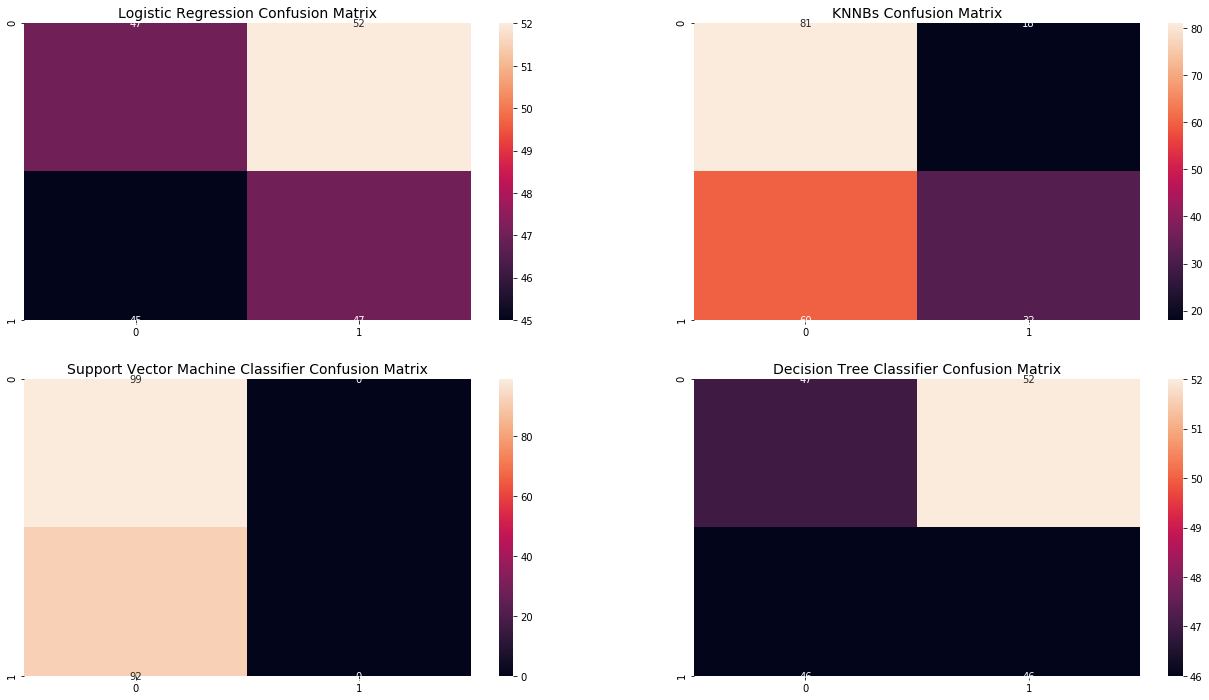

In [38]:
L_pred_reg=log_reg.predict(feature_test)
L_pred_knnb = log_knnb.predict(feature_test)
L_pred_svc = log_svc.predict(feature_test)
L_pred_tree = log_DT.predict(feature_test)

log_reg_cm = confusion_matrix(label_test, L_pred_reg)
knnb_cm = confusion_matrix(label_test, L_pred_knnb)
svc_cm = confusion_matrix(label_test, L_pred_svc)
tree_cm = confusion_matrix(label_test,L_pred_tree)
fig, ax = plt.subplots(2, 2,figsize=(22,12))


sb.heatmap(log_reg_cm, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression Confusion Matrix", fontsize=14)


sb.heatmap(knnb_cm, ax=ax[0][1], annot=True)
ax[0][1].set_title("KNNBs Confusion Matrix", fontsize=14)


sb.heatmap(svc_cm, ax=ax[1][0], annot=True)
ax[1][0].set_title("Support Vector Machine Classifier Confusion Matrix", fontsize=14)


sb.heatmap(tree_cm, ax=ax[1][1], annot=True)
ax[1][1].set_title("Decision Tree Classifier Confusion Matrix", fontsize=14)



plt.show()
# where:
# 00 => True Negative : rightfully classifed as 0 (no)
# 10 => False Negative : wrongfully classified as 0 (no)
# 01 => False Positive : wrongfully classified as 1 (yes)
# 11 => True Positive : rightfully classified as 1 (yes)



In [39]:
# classification reports for all classifiers 

print('LR:', classification_report(label_test, L_pred_reg))

print('KNN:', classification_report(label_test, L_pred_knnb))

print('SVM:', classification_report(label_test, L_pred_svc))

print('DT:', classification_report(label_test, L_pred_tree))


LR:               precision    recall  f1-score   support

           0       0.51      0.47      0.49        99
           1       0.47      0.51      0.49        92

    accuracy                           0.49       191
   macro avg       0.49      0.49      0.49       191
weighted avg       0.49      0.49      0.49       191

KNN:               precision    recall  f1-score   support

           0       0.57      0.82      0.68        99
           1       0.64      0.35      0.45        92

    accuracy                           0.59       191
   macro avg       0.61      0.58      0.56       191
weighted avg       0.61      0.59      0.57       191

SVM:               precision    recall  f1-score   support

           0       0.52      1.00      0.68        99
           1       0.00      0.00      0.00        92

    accuracy                           0.52       191
   macro avg       0.26      0.50      0.34       191
weighted avg       0.27      0.52      0.35       191

DT:  